## Data Preparation
#### First we analyze the data:
1. Search for missing values
2. Check dataset balance
#### Then we use NLP techniques such as:
1. Stemming
2. Tokenization
3. Stop-word removal

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import re
import string

from matplotlib import pyplot
from phrase_breaker import phrase_breaker
from collections import Counter

## Data Analysis

In [3]:
# Import the data onto dataframe
data = pd.read_csv("../reviews.csv", names=["Review Text", "Stars", "Polarity"])
data

,Review Text,Stars,Polarity
0,This is an extremely basic course. Machine lea...,1,negative
1,The course is ok but the certification procedu...,1,negative
2,"I just started week 3 , I have to admit that I...",1,negative
3,"However good the material and lectures may be,...",1,negative
4,Have to give a star so I will give it one. Ot...,1,negative
...,...,...,...
1289,"Going through the whole process, I really thin...",5,positive
1290,"Hello, I just want to say that this course was...",5,positive
1291,I wanted to say how Iam grateful for this oppu...,5,positive
1292,"I found this course has a good pace, I feel li...",5,positive


In [4]:
# Look for null values
data.isnull().values.any()

False

<AxesSubplot:xlabel='Polarity', ylabel='count'>

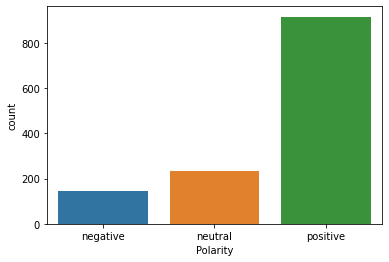

In [5]:
# Check dataset balance
sns.countplot(x="Polarity", data=data)

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

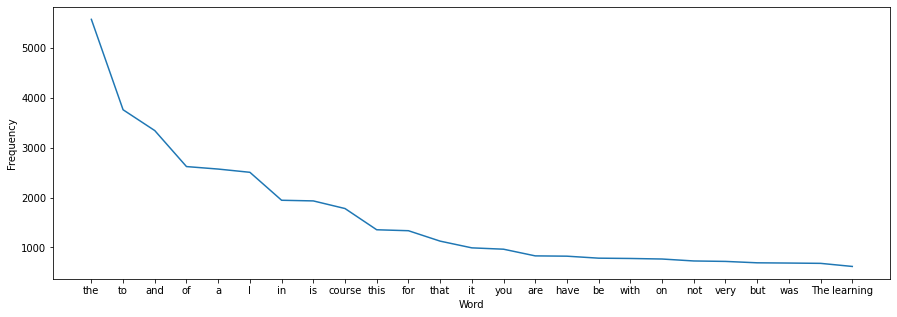

In [6]:
# K most frequent words
counter = Counter(" ".join(data["Review Text"]).split())
most_occur = counter.most_common(25)
words, freq = zip(*most_occur)

freq_words = pd.DataFrame({'Frequency': freq, 'Word': words})

fig, ax = pyplot.subplots(figsize=(15.0, 5.0))
sns.lineplot(data=freq_words, x="Word", y="Frequency", ax=ax)

In [7]:
# Creating dataframe with original vocabulary (existent words)
# Mainly for performance evaluation purposes

original = set()
data["Review Text"].str.split().apply(original.update)

original_data = {
    'Number of Words': [len(list(original))],
    'Type': ["original"],
}

pf_df = pd.DataFrame(original_data)
pf_df

,Number of Words,Type
0,11706,original


## Data Preparation

In [8]:
# Applying phrase breaker to reviews
data["Review Text"] = data["Review Text"].apply(phrase_breaker)
data["Review Text"].head()

0    This is an extremely basic course. Machine lea...
1    The course is ok but the certification procedu...
2    I just started week 3 , I have to admit that I...
3    However good the material and lectures may be,...
4    Have to give a star so I will give it one. Oth...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

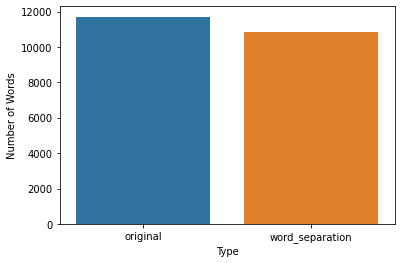

In [9]:
# Evaluate the decrease in complexity levels after separating every word in every review
word_sep = set()
data["Review Text"].str.split().apply(word_sep.update)

word_sep_data = {
    'Number of Words': len(list(word_sep)),
    'Type': "word_separation",
}

pf_df = pf_df.append(word_sep_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [10]:
# All review text is transformed into lower case
data["Review Text"] = data["Review Text"].str.lower()
data["Review Text"].head()

0    this is an extremely basic course. machine lea...
1    the course is ok but the certification procedu...
2    i just started week 3 , i have to admit that i...
3    however good the material and lectures may be,...
4    have to give a star so i will give it one. oth...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

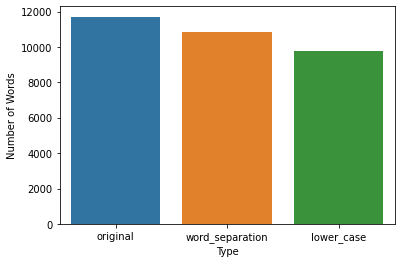

In [11]:
# Evaluate the decrease in complexity levels after lower casing every review
lower_case = set()
data["Review Text"].str.split().apply(lower_case.update)

lower_case_data = {
    'Number of Words': len(list(lower_case)),
    'Type': "lower_case",
}

pf_df = pf_df.append(lower_case_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [12]:
# Remove punctuations, digits, words containing digits and extra spaces
data["Review Text"] = data["Review Text"].apply(lambda x: re.sub('\w*\d\w*','', x))
data["Review Text"] = data["Review Text"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
data["Review Text"] = data["Review Text"].apply(lambda x: re.sub(' +',' ',x))
data["Review Text"][0]

'this is an extremely basic course machine learning is built on mathematics yet this course treats mathematics as a mysterious monster to be avoided at all costs which unfortunately left this student feeling frustrated and patronized so much time is wasted in the videos with arduous explanations of trivialities and so little taken up with the imparting of meaningful knowledge that in the end i abandoned the videos altogether the quizes were basic largely based on recall of rather than application of knowledge as were the programming assignments nearly all of which were spoon fed with the tasks sometimes being simple as multiplying two matrices togetherif you are serious about machine learning and comfortable with mathematics e g elementary linear algebra and probability do yourself a favour and take geoff hinton s neural networks course instead which is far more interesting and doesn t shy away from serious explanations of the mathematics of the underlying models'

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

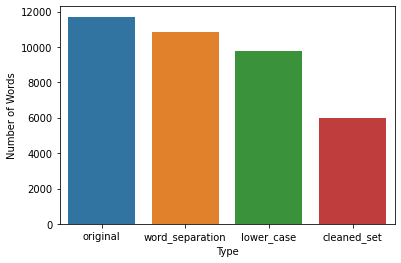

In [13]:
cleaned_set = set()
data["Review Text"].str.split().apply(cleaned_set.update)

cleaned_set_data = {
    'Number of Words': len(list(cleaned_set)),
    'Type': "cleaned_set",
}

pf_df = pf_df.append(cleaned_set_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)